<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gerardo Ruiz Velasco y Eduardo

**Fecha:** 8 de marzo del 2021.

**Expediente** : 715878 | . 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link GitHub:https://github.com/EduardoLoza/ProyectoConjunto_ELoza_GRuiz**

### Tarea 5: Clase 9

># <font color ='red'> **Tarea 5** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Despejamos x:
 $$\frac{1}{\sqrt {1-x}\sqrt {x}\pi}$$

#### Función Inversa:
$$x=\sin^{2}(\frac{\mu\pi}{2}) = F_i$$


In [61]:
#Solución Gerardo
def eje1(f, finv, N):
    u=np.random.uniform(0,1,N)
    frand=finv(u)
    x=np.arange(0,1,.01)
    fden=f(x)
    plt.hist(frand,density=True, bins=50)#histograma de la función de proba
    plt.plot(x,fden)#plot de la x despejada
    plt.show()

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


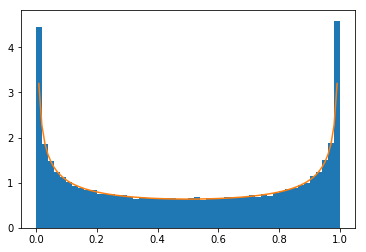

In [62]:
#Paránetros de entrada función eje1

f = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x)) #Función de densidad de probabilidad 
finv = lambda u: np.sin(u*np.pi/2)**2 #x despejada
N = 100000 #número de repeticiones 
eje1(f,finv,N)

In [6]:
#Solución Eduardo
f = lambda x: 1/((np.sqrt(1-x))*(np.sqrt(x))*np.pi) #Derivada de F(x) para sacar f(x)
Finv = lambda u : np.sin((np.pi*u)/2)**2 #Inversa de F(x) igualando a U y despejando x
def comparar_aleatorios_densidad(f, Finv, N):
    U = np.random.uniform(0, 1, N)
    f_rand = Finv(U)
    x = np.arange(.03, .97, .01)
    f_densidad = f(x)
    plt.hist(f_rand, bins = 40,density=True)
    plt.plot(x, f_densidad)
    plt.show()

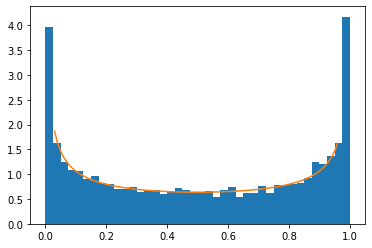

array([0.45942317, 0.56712037, 0.00599902, ..., 0.32181302, 0.93431075,
       0.75581864])

In [7]:
N = 10000
U = np.random.uniform(0, 200, N)
x = np.arange(.1,.2,.001)
comparar_aleatorios_densidad(f, Finv, N)
Finv(U)

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

In [ ]:
#Solución Gerardo

In [12]:
def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_acumulada: 'de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in prob_acumulada if i<X[j]),range(N))))
    return v

def plot_histogram_discrete(dist:'señal de varibles aleatorias',
                            label,
                            den=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,6])
    y,x = np.histogram(dist,bins = len(set(dist)),density = den) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
def P_acum_Binomial(n,p):
    Pr = np.zeros(n) #vector a llenar 
    Pr[0] = (1-p)**n 
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Comprensión de listas 
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

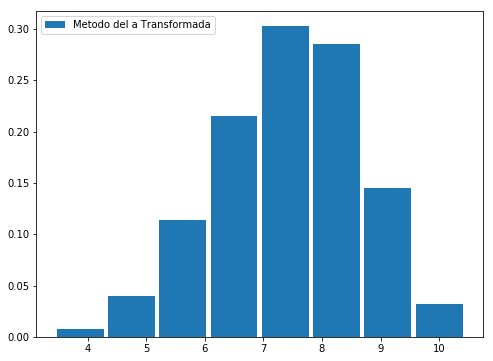

In [57]:
# Parametros de entrada
n = 10; p = 0.7; N = 1000

p_acum = P_acum_Binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'Metodo del a Transformada')

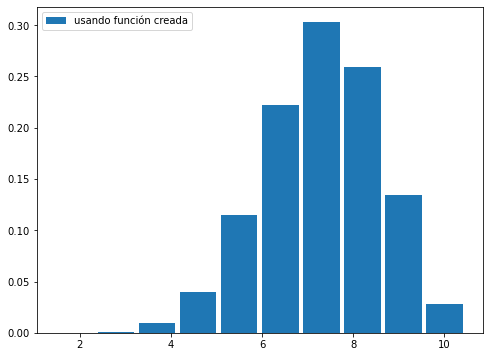

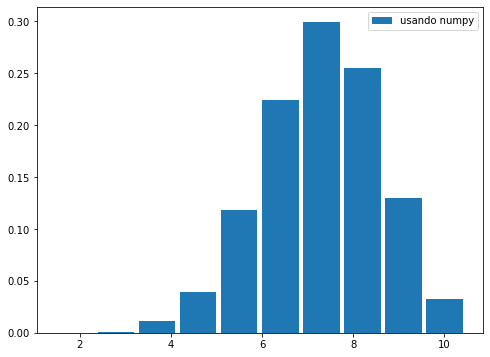

In [14]:
#Solución Eduardo
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')